# Quick start

$$ V_{n}(R)=\frac{\pi^{\frac{n}{2}}}{\Gamma\left(\frac{n}{2}+1\right)} R^{n} $$

`rball` is a utility to store and interpolate instrument response matrices on the sky.


## Creating a ResponseDatabase object

First we will use a demo database stored in an HDF5 file to create a response database.

In [1]:
from rball import ResponseDatabase
from rball.utils import get_path_of_data_file

import h5py


%matplotlib inline

file_name = get_path_of_data_file("demo_rsp_database.h5")

with h5py.File(file_name, "r") as f:

    # the base grid point matrices
    # should be an (N grid points, N ebounds, N monte carlo energies)
    # numpy array

    list_of_matrices = f["matrix"][()]

    # theta and phi are the
    # lon and lat points of
    # the matrix database in radian

    theta = f["theta"][()]

    phi = f["phi"][()]

    # the bounds of the response

    ebounds = f["ebounds"][()]

    mc_energies = f["mc_energies"][()]

    rsp_db = ResponseDatabase(
        list_of_matrices=list_of_matrices,
        theta=theta,
        phi=phi,
        ebounds=ebounds,
        monte_carlo_energies=mc_energies,
    )

[WARNING ] The naima package is not available. Models that depend on it will not be available


[WARNING ] The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it will not be available.


[WARNING ] The ebltable package is not available. Models that depend on it will not be available


[INFO    ] Starting 3ML!


[WARNING ] no display variable set. using backend for graphics without display (agg)


[WARNING ] ROOT minimizer not available


[WARNING ] Multinest minimizer not available


[WARNING ] PyGMO is not available


[WARNING ] The cthreeML package is not installed. You will not be able to use plugins which require the C/C++ interface (currently HAWC)


[WARNING ] Could not import plugin HAWCLike.py. Do you have the relative instrument software installed and configured?


[WARNING ] Could not import plugin FermiLATLike.py. Do you have the relative instrument software installed and configured?


[WARNING ] No fermitools installed


[WARNING ] Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


[WARNING ] Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


[WARNING ] Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


## Examining the sky grid

We can view the grid in 3D. When a point in the sky is selected, a [Delaunay triangulation](https://en.wikipedia.org/wiki/Delaunay_triangulation) is used to find the three matrices surrounding this point.

In [2]:
rsp_db.plot_verticies_ipv(selected_location=[5, -45])


WARNING UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant



## Using and interpolating responses

Internally, the ```ResponseDatabase``` is storing a 3ML ```InstrumentResponse``` object


WARNING MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()



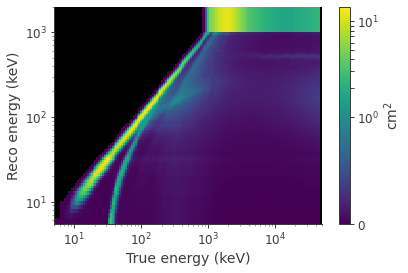

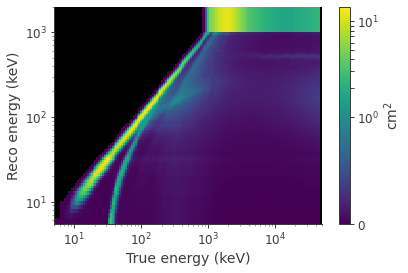

In [3]:
rsp_db.current_response.plot_matrix()

When we want to interpolate a matrix to a point on the sky, the encapsulating matricies ($M_i$) are found and the barycentered distances ($b_i$) withing the triangle is used to create an interpolated matrix ($M_{\mathrm{intrp}}$) such that

$$ M_{\mathrm{intrp}} = \sum^{3}_{i} b_i M_{i}  $$

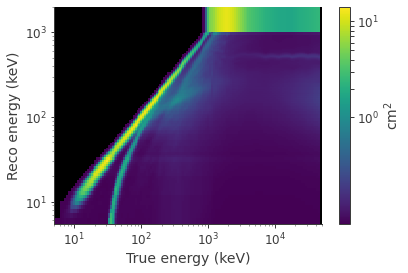

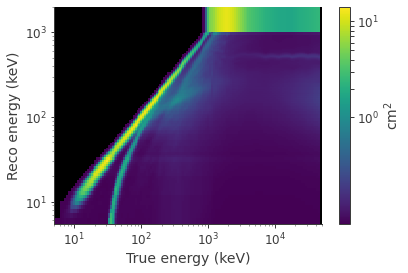

In [4]:
rsp_db.interpolate_to_position(0.0, 0)
rsp_db.current_response.plot_matrix()

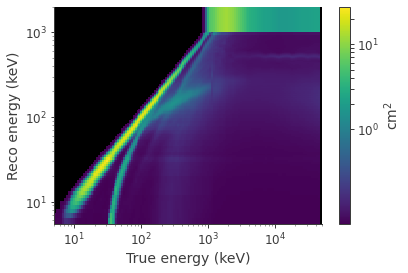

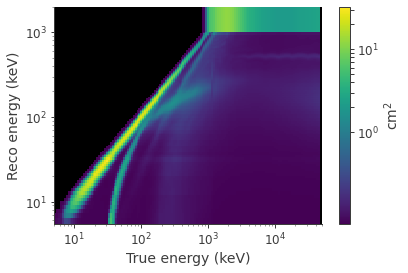

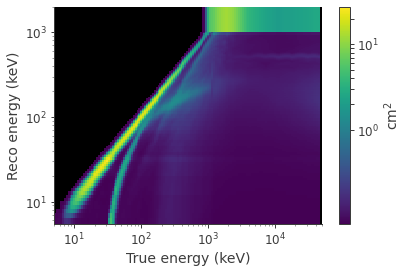

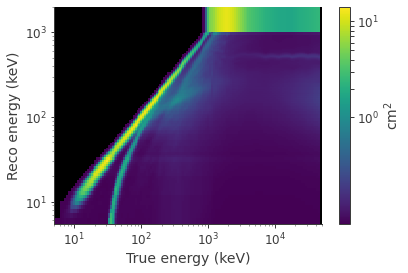

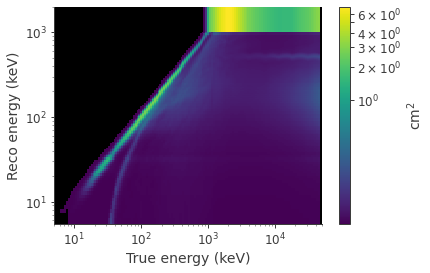

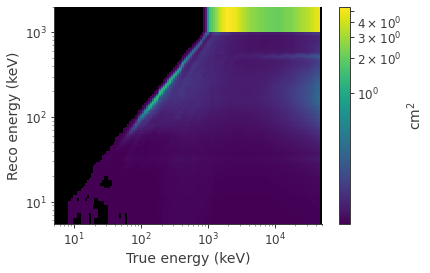

In [5]:
for theta in range(-90, 90, 30):
    rsp_db.interpolate_to_position(0.0, theta)
    rsp_db.current_response.plot_matrix()

## General notes on units and construction

The theta and phi coordinates are internally in **radians**, but all inputs are in **degrees** for the user. Moreover, both the plotting and interpolation assume inputs in J2000 RA, Dec coordinates. When subclassing ```ResponseDatabase```, an private function should be defined (``` _transform_to_instrument_coordinates```) which takes as inputs RA and Dec in degrees and transforms to the spacecraft coordinates of the response grid points resulting in a return of a theta, phi tuple in radians.


